
## Problem Description
The objective is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset and to find out the factors which largely cause the condition.

All patients in the dataset are female.

Diabetes is caused due to various factors such as pregnancies, glucose, blood pressure, skin thickness, insulin, BMI and age.
## Features in data set
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

Age: Age (years)
## Target Variable 
Outcome: Class variable (0 if non-diabetic, 1 if diabetic)
## Model Description
Numpy, Pandas, Matplotlib, Seaborn libraries have been used for Data Cleaning, Exploratory Data Analysis, and Data Visualization.

Feature Scaling has been performed.




# PREDICTING DIABETES IN PATIENTS

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
%matplotlib inline

## 2. Load the dataset

In [2]:
df=pd.read_csv('diabetes.csv')

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

https://www.kaggle.com/uciml/pima-indians-diabetes-database


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Exploratory Data Analysis (EDA) and Graph Vizualizations

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
sns.set_style('whitegrid')

### 3.1. Outcome Distribution

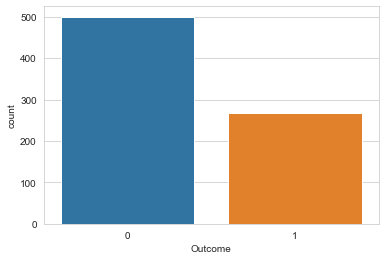

In [7]:
sns.countplot(x='Outcome',data=df)

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

##### 500 patients are healthy while 268 patients have been diagnosed with diabetes

### 3.2. Age Distribution

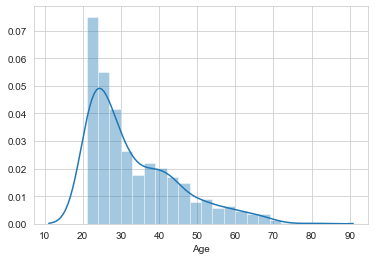

In [9]:
sns.distplot(df['Age'],bins=20)

##### Most of the patients in this dataset are in the age group of 20 to 30 years, with the minimum age as 21 years

### 3.3. Pregnancy Distribution

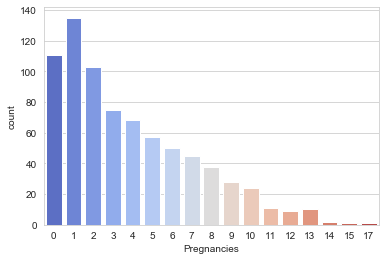

In [10]:
sns.countplot(x='Pregnancies',data=df,palette='coolwarm')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3.4. Missing data

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### From the head of our data we can see that some values are 0. It doesn't make sense here and this indicates that there are missing values in our data.

Let's replace 0 value by NaN in the columns where it doesn't make sense to be 0:

In [13]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness',
                                                                      'Insulin','BMI']].replace(0,np.NaN)

Let's see the distribution of the NaN values

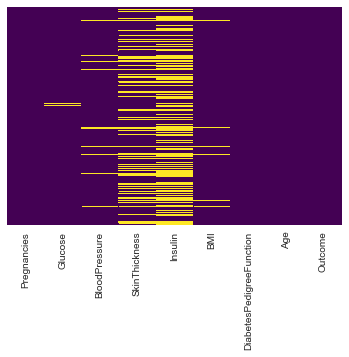

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [15]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

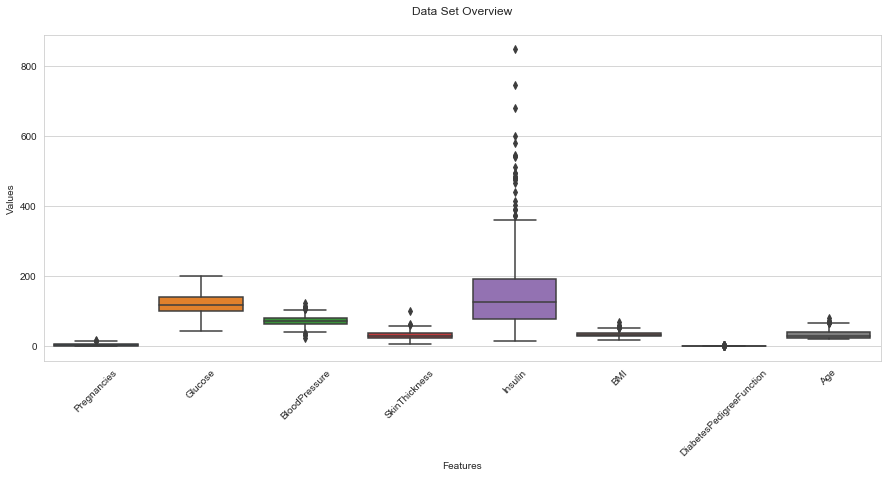

In [16]:
df_melted=pd.melt(frame=df,id_vars='Outcome',var_name='Features',value_name='Values')
fig,ax=plt.subplots(figsize=(15,6))
ax=sns.boxplot(x='Features',y='Values',data=df_melted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Data Set Overview',pad=20)
plt.show()


From above plot we can see that there are outliers in the data and those outliers might be valid values so we can't replace the missing values with the mean (since the mean is heavily affected by outliers but median is not). Instead we will use the __median by target__ to replace the missing data to get a much more __realistic data.__

### 3.5. Replacing missing data

In [17]:
def take_median(feature):
    temp = df.groupby(['Outcome'])[[feature]].median().reset_index()
    return temp

In [18]:
df_dang=df[df['Outcome']!=0]
df_safe=df[df['Outcome']==0]

def dist_plot(feature,bins):
    plt.figure(figsize=(15,6))
    sns.set_palette('Set1')
    ax=sns.distplot(df_dang[feature].dropna(),hist=True,kde=True,bins=bins,label='Diabetic')
    ax=sns.distplot(df_safe[feature].dropna(),hist=True,kde=True,bins=bins,label='Healthy')
    ax.set_xlabel(None)
    ax.legend()
    plt.title(feature,pad=20)
    plt.show()

### 3.5.1. Glucose

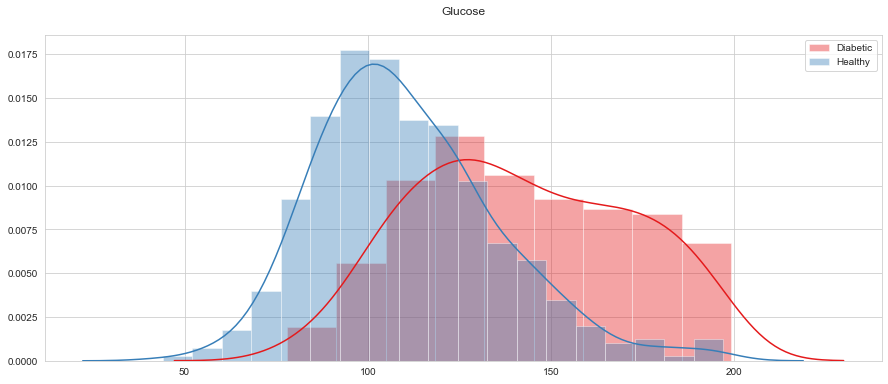

In [19]:
dist_plot('Glucose',None)

In [20]:
take_median('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


We got 107 Plasma glucose concentration level for non diabetic patients and 140 for diabetic patients

Replacing the NaN values in data sets with the resultant values

In [21]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()),'Glucose'] = 107
df.loc[(df['Outcome'] != 0 ) & (df['Glucose'].isnull()),'Glucose'] = 140

### 3.5.2. Blood Pressure

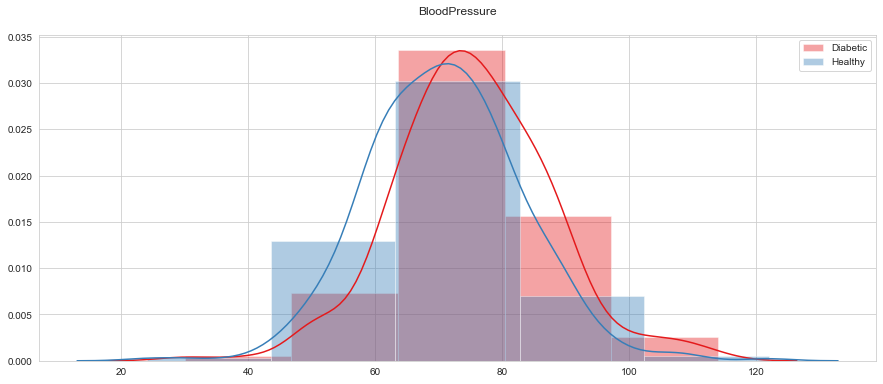

In [22]:
dist_plot('BloodPressure',5)

In [23]:
take_median('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


We got 70 Diastolic blood pressure for non diabetic patients and 74.5 for diabetic patients

Replacing the NaN values in data sets with the resultant values

In [24]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()),'BloodPressure'] = 70
df.loc[(df['Outcome'] != 0 ) & (df['BloodPressure'].isnull()),'BloodPressure'] = 74.5

### 3.5.3. Skin Thickness

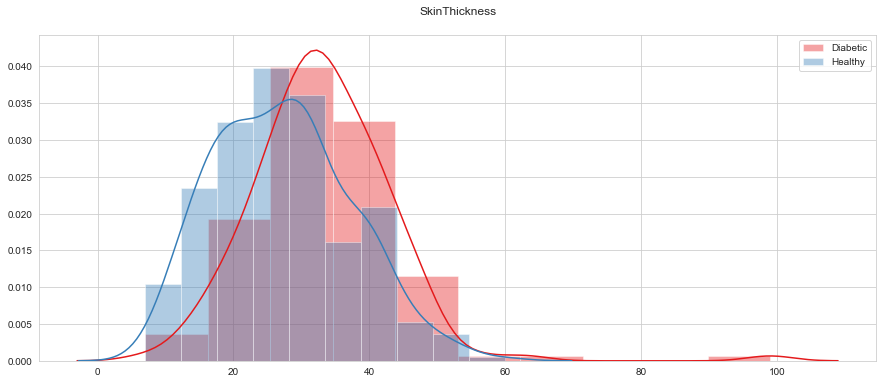

In [25]:
dist_plot('SkinThickness',10)

In [26]:
take_median('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


We got 27 Triceps skin fold thickness for non diabetic patients and 32 for diabetic patients

Replacing the NaN values in data sets with the resultant values

In [27]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()),'SkinThickness'] = 27
df.loc[(df['Outcome'] != 0 ) & (df['SkinThickness'].isnull()),'SkinThickness'] = 32

### 3.5.4. Insulin

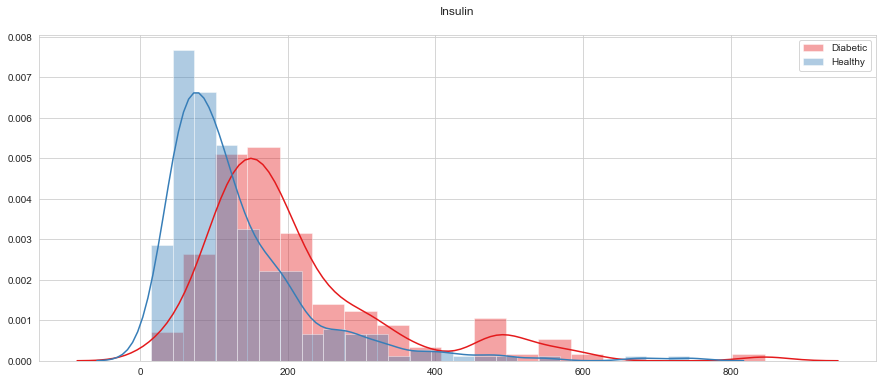

In [28]:
dist_plot('Insulin',None)

In [29]:
take_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


We got 102.5 serum insulin for non diabetic patients and 169.5 for diabetic patients

Replacing the NaN values in data sets with the resultant values

In [30]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()),'Insulin'] = 102.5
df.loc[(df['Outcome'] != 0 ) & (df['Insulin'].isnull()),'Insulin'] = 169.5

### 3.5.5. BMI

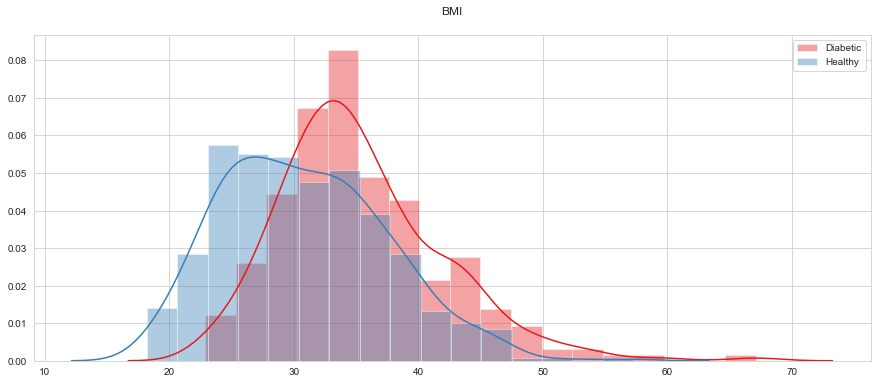

In [31]:
dist_plot('BMI',None)

In [32]:
take_median('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


We got 30.1 Body mass index for non diabetic patients and 34.3 for diabetic patients

Replacing the NaN values in data sets with the resultant values

In [33]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()),'BMI'] = 30.1
df.loc[(df['Outcome'] != 0 ) & (df['BMI'].isnull()),'BMI'] = 34.3

### 3.5.6. Remaining Distributions

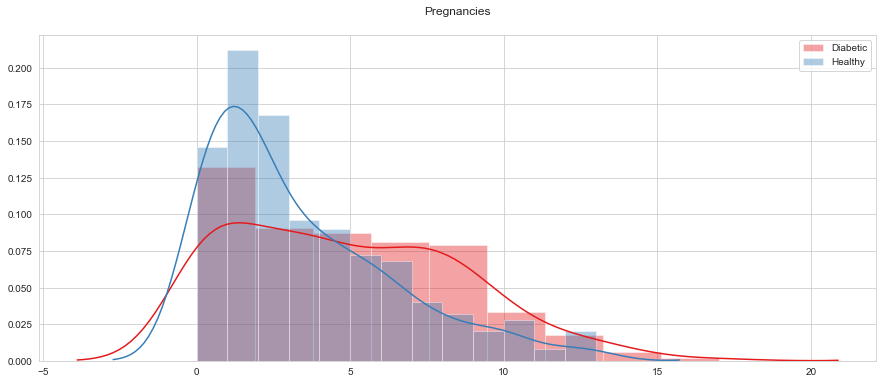

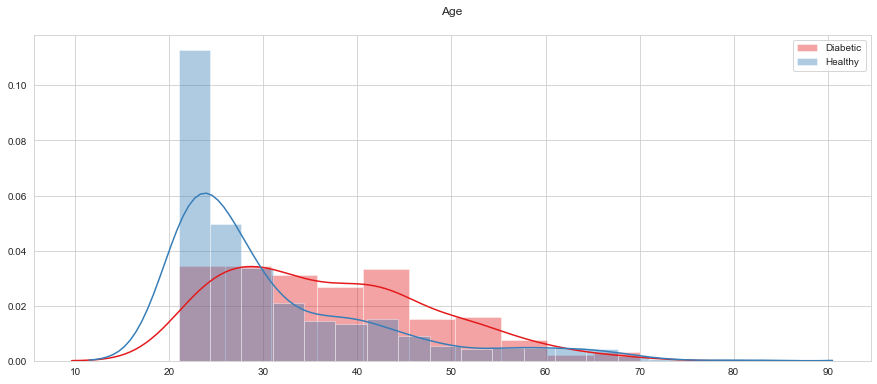

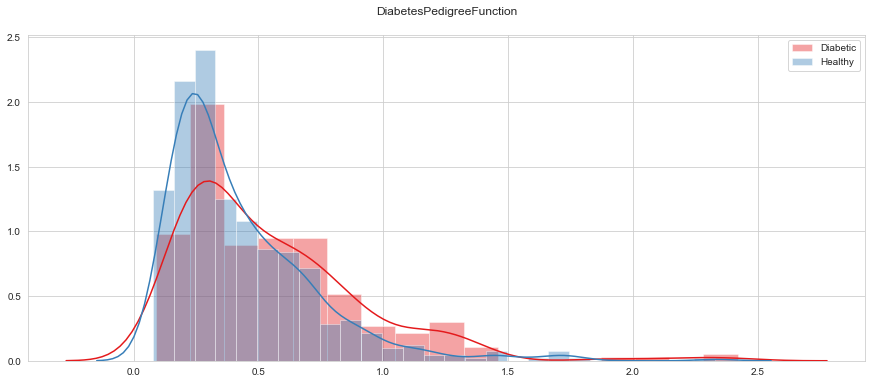

In [34]:
dist_plot('Pregnancies',None)
dist_plot('Age',None)
dist_plot('DiabetesPedigreeFunction',None)

### 3.6 Checking the distribution of NaN values again, all nulls taken care of

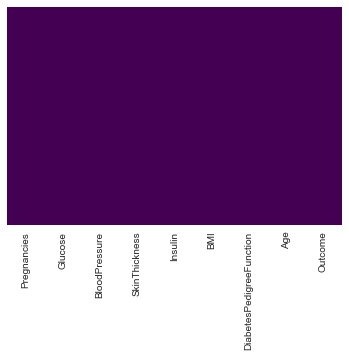

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [36]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values

### 3.7. Pregnancies vs Age

Let's see how the pregnancies and age affect the outcome 

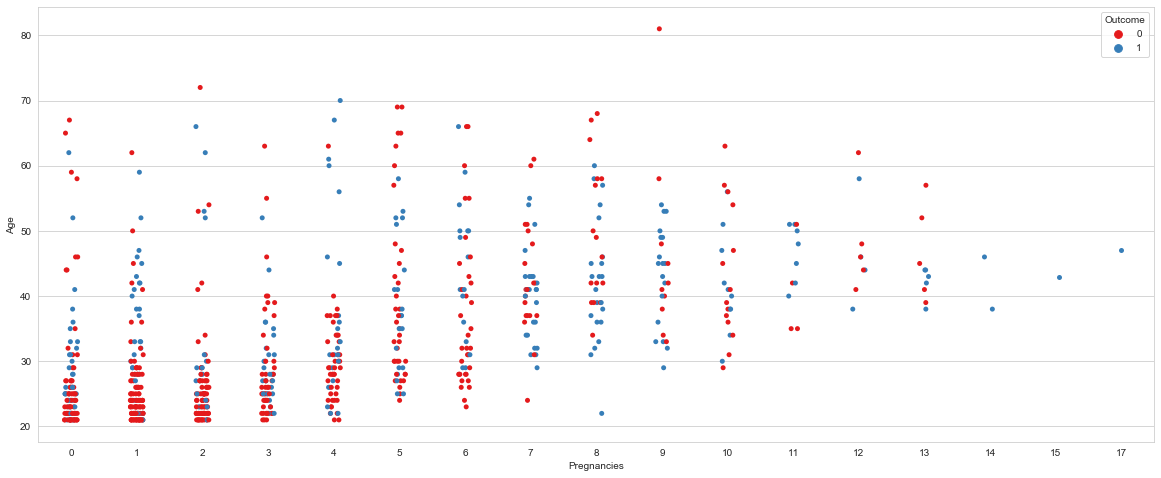

In [37]:
plt.figure(figsize=(20,8))
sns.stripplot(x='Pregnancies',y='Age',data=df,hue='Outcome',jitter=True)

Healthy patients are concentrated with Age <= 30 and Pregnancies <= 6

### 3.8. Glucose vs Insulin

Let's see how the glucose and insulin affect the outcome

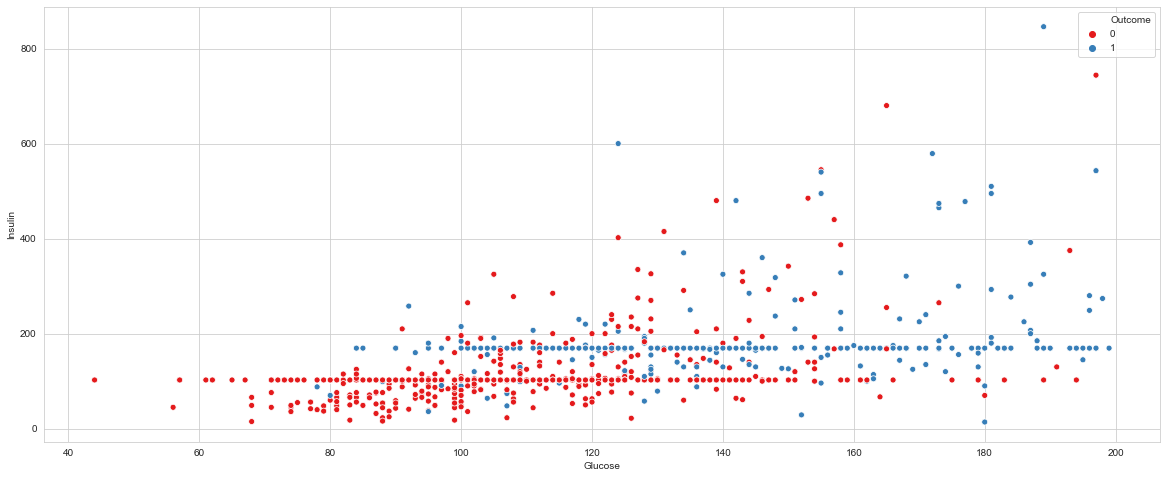

In [38]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Glucose',y='Insulin',data=df,hue='Outcome')

Healthy patients are concentrated with Insulin < 200 and Glucose <=120

### 3.9. Skin Thickness vs BMI

Let's see how the skin thickness and BMI affect the outcome

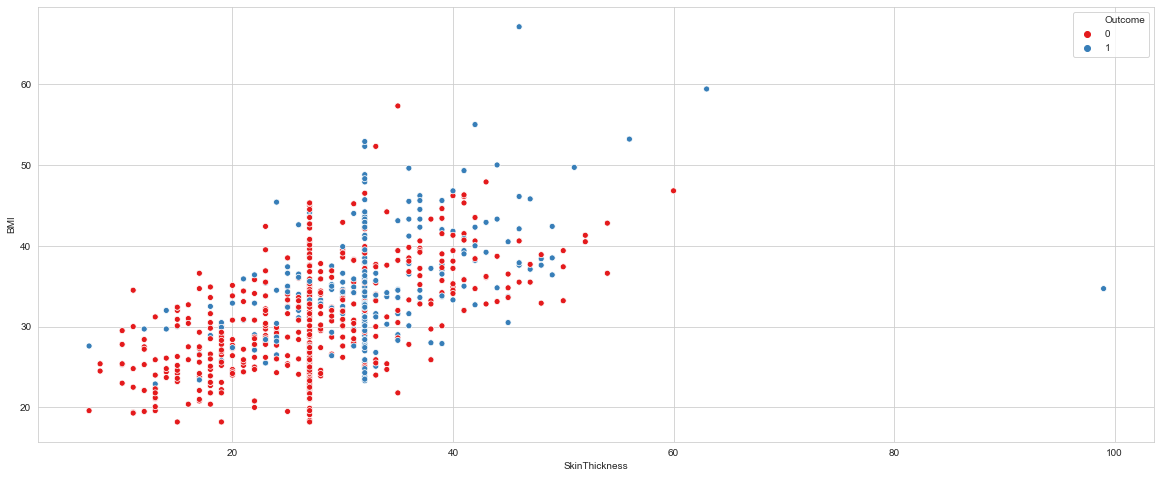

In [39]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='SkinThickness',y='BMI',data=df,hue='Outcome')

Healthy patients are concentrated with BMI <= 30 and SkinThickness <= 20

### 3.10. Glucose vs Age

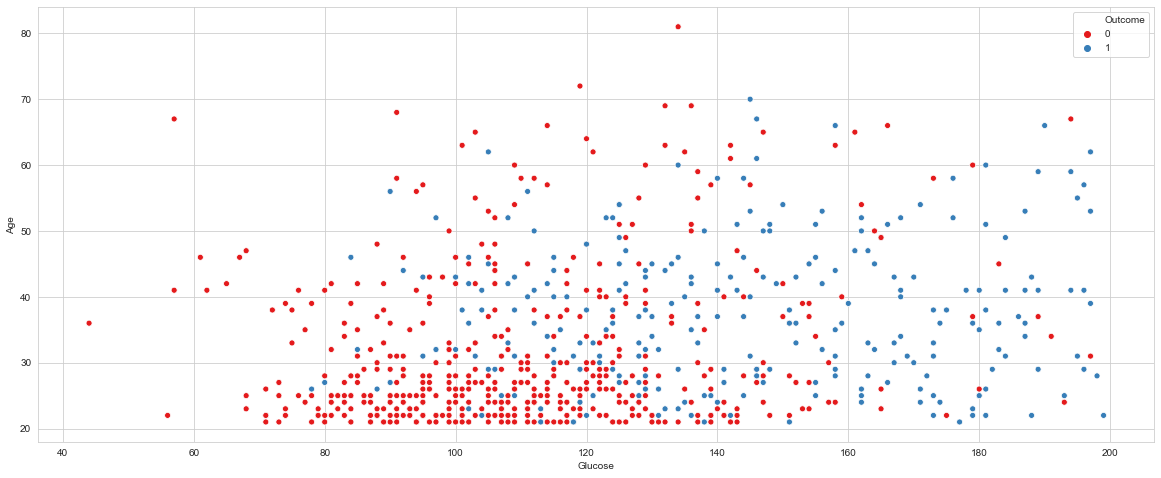

In [40]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Glucose',y='Age',data=df,hue='Outcome')

Healthy patients are concentrated with Age <= 30 and Glucose <= 120

### 3.11. Glucose vs Blood Pressure

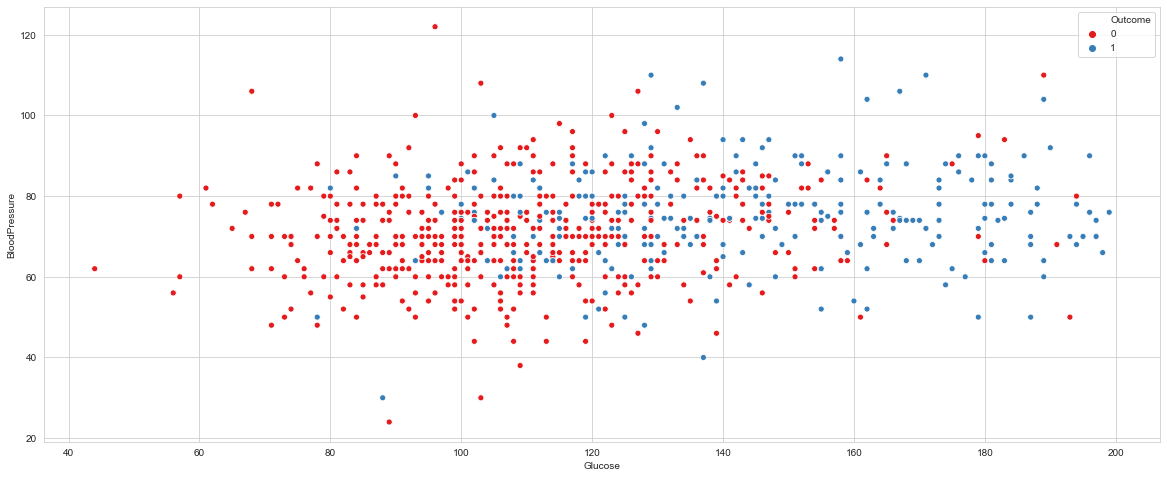

In [41]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Glucose',y='BloodPressure',data=df,hue='Outcome')

Healthy patients are concentrated with BloodPressure <= 80 and Glucose <= 120

### 3.12. Glucose vs BMI

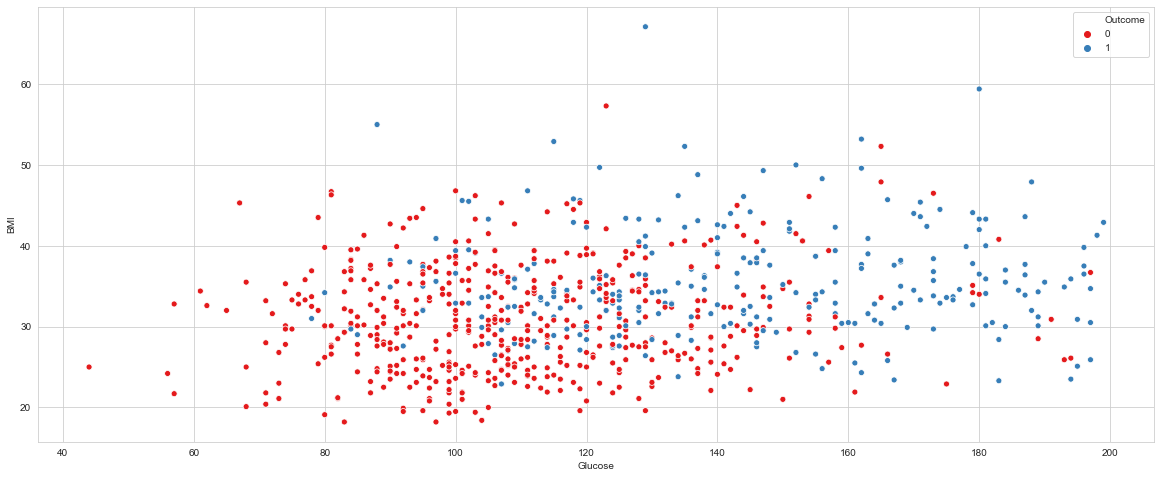

In [42]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Glucose',y='BMI',data=df,hue='Outcome')

Healthy patients are concentrated with BMI <= 30 and Glucose <= 120

## 4. Normalization and Standardization

### 4.1 Mean and Variance

In [43]:
import statistics
for i in df.columns:
    print(i+"\nMean: ", end="")
    print(round(statistics.mean(df[i]),2), end="")
    print("\tVariance: ",end="")
    print(round(statistics.variance(df[i]),2), end="\n\n")

Pregnancies
Mean: 3.85	Variance: 11.35

Glucose
Mean: 121.68	Variance: 928.07

BloodPressure
Mean: 72.39	Variance: 146.56

SkinThickness
Mean: 29.09	Variance: 79.05

Insulin
Mean: 141.75	Variance: 7938.96

BMI
Mean: 32.43	Variance: 47.34

DiabetesPedigreeFunction
Mean: 0.47	Variance: 0.11

Age
Mean: 33.24	Variance: 138.3

Outcome
Mean: 0.35	Variance: 0.23



### 4.2 Normalization and Standardization

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler() 
dfnormal = scaler1.fit_transform(df.iloc[0:,0:8])

In [45]:
column_values1 = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dfnormal = pd.DataFrame(data = dfnormal, columns = column_values1) 

In [46]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler() 
dfscaled = scaler2.fit_transform(dfnormal.iloc[0:,0:8])

In [47]:
column_values = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dfscaled = pd.DataFrame(data = dfscaled, columns = column_values) 

### 4.3 Distributions after scaling

In [48]:
dfscaled['Outcome']=df['Outcome']

Distributions after being scaled to mean 0 and variance 1:
Pregnancies


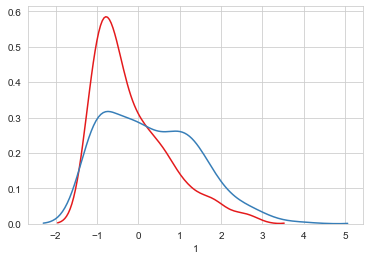

Glucose


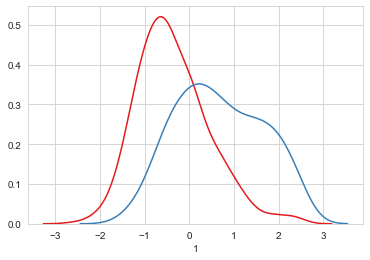

BloodPressure


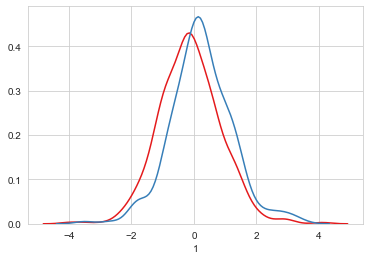

SkinThickness


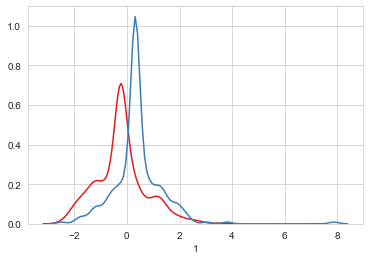

Insulin


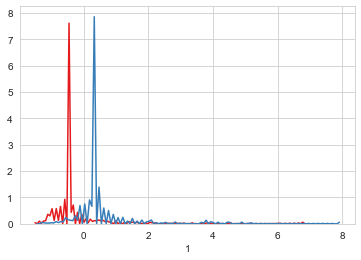

BMI


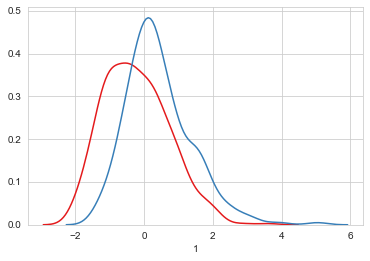

DiabetesPedigreeFunction


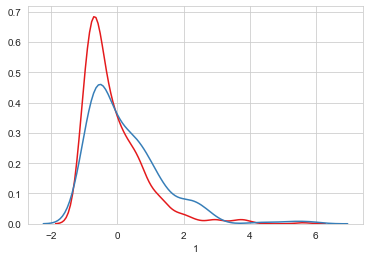

Age


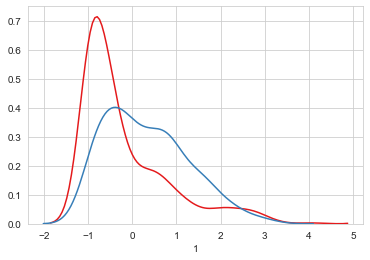

In [49]:
print("Distributions after being scaled to mean 0 and variance 1:" )
for i in dfscaled.columns[:-1]:
    print(i)
    dfscaled.groupby('Outcome')[i].apply(sns.distplot,hist=False)
    plt.show()

## 5. Hypothesis Testing

#### 5.1 Research hypothesis: 
Null hypothesis H0:  2 independent samples of Glucose (grouped by whether patient is Diabetic or not) have identical average
    __(xbar1 = xbar2)__
    
Alternative hypothesis Ha:  2 independent samples of Glucose (grouped by whether patient is Diabetic or not) have DO NOT identical average
    __(xbar does not = xbar2)__

#### 5.2 Sampling data

In [50]:
sample_1=df['Glucose'][df['Outcome']==0].sample(n=30)
sample_2=df['Glucose'][df['Outcome']==1].sample(n=30)

#### 5.3 Performing T-test for the means of two independent samples of scores
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values

In [51]:
t_stat, p_val=scipy.stats.ttest_ind(sample_1,sample_2,equal_var=False)

In [52]:
print("T statistic: ",round(t_stat,5),"\nP value: ",round(p_val,5))

T statistic:  -4.90412 
P value:  1e-05


Considering significance level alpha as 0.01 (Confidence level 99%), we can hence see that __p values < alpha__, hence we reject the null hypothesis and conclude that the average value of Glucose in samples of those with Diabetes are __NOT identical__ to average value of Glucose in samples of those without Diabetes. Hence __H0 is rejected and Ha is accpeted.__

### 6. Correlation Heatmap

(9.0, 0.0)

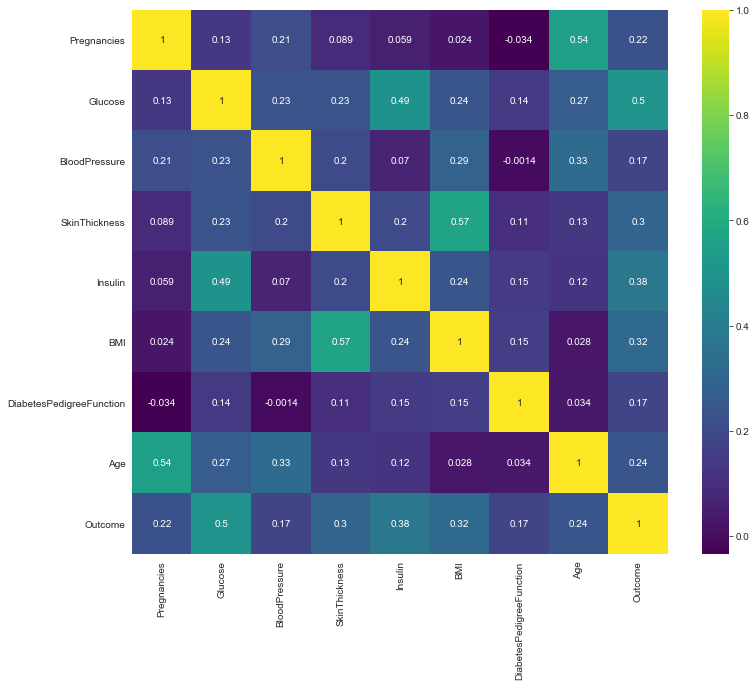

In [53]:
correl=dfscaled.corr()
plt.subplots(figsize=(12,10))
fig1=sns.heatmap(correl, cmap='viridis',annot=True)
bottom, top = fig1.get_ylim()
fig1.set_ylim(bottom + 0.5, top - 0.5)

#### Insights from correlation heatmap:
1.	The highest correlation between the outcome and any one of the medical features is with glucose. This is obviously an overwhelmingly contributing factor in patients with diabetes.
2.	The BMI and skin thickness also have a strong correlation indicating that the 2 are closely connected in terms of body fat content.
3.	We know from basic biology that insulin regulates the usage of glucose in your body and the correlation between the 2 reflects that here as well. 


## Inference
For a patient to be diabetic, the Glucose reading is the biggest determining factor followed by the insulin reading. 